# MTA-data-project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from datetime import datetime


In [2]:
num_weeks = 26

#initialise the date for the first week of the dataset (week ending on start_date)
filedate = pd.Timestamp('2020-02-29 00:00:00')


#initialise the regex for the MTA turnstile url
filename_regex = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"

filelist = []

for numfiles in range (num_weeks):

    # create the appropriate filename for the week by linking the right format of the dates to turnstile_{}.txt
    filedate_str = str(filedate.year)[2:4] + str(filedate.month).zfill(2) + str(filedate.day).zfill(2)
    filename = filename_regex.format(filedate_str)

    # read the file and append it to the list of files to be concacated
    MTA_data_covid = pd.read_csv(filename, parse_dates=['DATE'], keep_date_col=True)
    filelist.append(MTA_data_covid)

    # advance to the next week
    filedate += pd.Timedelta(days=7)

MTA_data_covid = pd.concat(filelist, axis=0, ignore_index=True)

In [3]:
#read data 
MTA_data_covid

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,03:00:00,RECOVR AUD,7386928,2505750
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,07:00:00,RECOVR AUD,7386935,2505759
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,11:00:00,RECOVR AUD,7386975,2505840
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,15:00:00,RECOVR AUD,7387107,2505884
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,19:00:00,REGULAR,7387394,2505952
...,...,...,...,...,...,...,...,...,...,...,...
5379334,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,05:00:00,REGULAR,5554,539
5379335,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,09:00:00,REGULAR,5554,539
5379336,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,13:00:00,REGULAR,5554,539
5379337,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,17:00:00,REGULAR,5554,539


In [4]:
#Checking general info about dataframe
MTA_data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5379339 entries, 0 to 5379338
Data columns (total 11 columns):
 #   Column                                                                Dtype         
---  ------                                                                -----         
 0   C/A                                                                   object        
 1   UNIT                                                                  object        
 2   SCP                                                                   object        
 3   STATION                                                               object        
 4   LINENAME                                                              object        
 5   DIVISION                                                              object        
 6   DATE                                                                  datetime64[ns]
 7   TIME                                                                  ob

In [5]:
MTA_data_covid["DATE"]=MTA_data_covid["DATE"].astype("datetime64[ns]")

In [6]:
MTA_data_covid.isnull().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [7]:
#Checking DataFrame's first 5 rows
MTA_data_covid.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,03:00:00,RECOVR AUD,7386928,2505750
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,07:00:00,RECOVR AUD,7386935,2505759
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,11:00:00,RECOVR AUD,7386975,2505840
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,15:00:00,RECOVR AUD,7387107,2505884
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,19:00:00,REGULAR,7387394,2505952


In [8]:
#Checking DataFrame's last 5 rows
MTA_data_covid.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
5379334,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,05:00:00,REGULAR,5554,539
5379335,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,09:00:00,REGULAR,5554,539
5379336,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,13:00:00,REGULAR,5554,539
5379337,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,17:00:00,REGULAR,5554,539
5379338,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,21:00:00,REGULAR,5554,539


In [9]:
MTA_data_covid.isnull().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [10]:
#Checking DataFrame size
MTA_data_covid.shape

(5379339, 11)

In [11]:
#Checking basic descriptive statistics for numerical columns.
MTA_data_covid.describe()

,ENTRIES,EXITS
count,5.379339e+06,5.379339e+06
mean,4.312642e+07,3.535477e+07
std,2.193795e+08,1.993347e+08
min,0.000000e+00,0.000000e+00
25%,3.019955e+05,1.326845e+05
50%,1.853250e+06,1.071865e+06
75%,6.495662e+06,4.408532e+06
max,2.128798e+09,2.123369e+09


In [12]:
# Adding "TURNSTILE" columns that concatenate 'C/A', 'UNIT', 'SCP'

MTA_data_covid["TURNSTILE"] = MTA_data_covid["C/A"]+"-"+MTA_data_covid["UNIT"]+"-"+MTA_data_covid["SCP"]
MTA_data_covid.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,03:00:00,RECOVR AUD,7386928,2505750,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,07:00:00,RECOVR AUD,7386935,2505759,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,11:00:00,RECOVR AUD,7386975,2505840,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,15:00:00,RECOVR AUD,7387107,2505884,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,19:00:00,REGULAR,7387394,2505952,A002-R051-02-00-00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,23:00:00,REGULAR,7387549,2505985,A002-R051-02-00-00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-23,03:00:00,REGULAR,7387582,2505995,A002-R051-02-00-00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-23,07:00:00,REGULAR,7387587,2506000,A002-R051-02-00-00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-23,11:00:00,REGULAR,7387631,2506045,A002-R051-02-00-00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-23,15:00:00,REGULAR,7387768,2506110,A002-R051-02-00-00


In [13]:
# Check the column headings
MTA_data_covid.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'TURNSTILE'],
      dtype='object')

In [14]:
#Checking duplicates rows and drop.

MTA_data_covid.drop_duplicates(subset=None, keep="first", inplace=True)
MTA_data_covid


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,03:00:00,RECOVR AUD,7386928,2505750,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,07:00:00,RECOVR AUD,7386935,2505759,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,11:00:00,RECOVR AUD,7386975,2505840,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,15:00:00,RECOVR AUD,7387107,2505884,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,19:00:00,REGULAR,7387394,2505952,A002-R051-02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...
5379334,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,05:00:00,REGULAR,5554,539,TRAM2-R469-00-05-01
5379335,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,09:00:00,REGULAR,5554,539,TRAM2-R469-00-05-01
5379336,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,13:00:00,REGULAR,5554,539,TRAM2-R469-00-05-01
5379337,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,17:00:00,REGULAR,5554,539,TRAM2-R469-00-05-01


In [15]:
#Remove the extra spaces in the column headings
MTA_data_covid.columns = [column.strip() for column in MTA_data_covid.columns]

In [16]:

# Check column headings again.
MTA_data_covid.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'TURNSTILE'],
      dtype='object')

In [17]:
MTA_data_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5379339 entries, 0 to 5379338
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       datetime64[ns]
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  TURNSTILE  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 533.5+ MB


In [18]:
MTA_data_covid['HOUR'] = MTA_data_covid['TIME'].apply(lambda x:int(x[:2]))
MTA_data_covid

MTA_data_covid['DATE'] = pd.to_datetime(MTA_data_covid['DATE'])

MTA_data_covid['Datetime'] = MTA_data_covid['DATE'] + pd.to_timedelta(MTA_data_covid['HOUR'], unit='H')

In [19]:
MTA_data_covid

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,HOUR,Datetime
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,03:00:00,RECOVR AUD,7386928,2505750,A002-R051-02-00-00,3,2020-02-22 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,07:00:00,RECOVR AUD,7386935,2505759,A002-R051-02-00-00,7,2020-02-22 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,11:00:00,RECOVR AUD,7386975,2505840,A002-R051-02-00-00,11,2020-02-22 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,15:00:00,RECOVR AUD,7387107,2505884,A002-R051-02-00-00,15,2020-02-22 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,19:00:00,REGULAR,7387394,2505952,A002-R051-02-00-00,19,2020-02-22 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5379334,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,05:00:00,REGULAR,5554,539,TRAM2-R469-00-05-01,5,2020-08-21 05:00:00
5379335,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,09:00:00,REGULAR,5554,539,TRAM2-R469-00-05-01,9,2020-08-21 09:00:00
5379336,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,13:00:00,REGULAR,5554,539,TRAM2-R469-00-05-01,13,2020-08-21 13:00:00
5379337,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,17:00:00,REGULAR,5554,539,TRAM2-R469-00-05-01,17,2020-08-21 17:00:00


In [20]:
MTA_data_covid["NAMEOFDAY"]= MTA_data_covid["Datetime"].dt.day_name()

#Checking sample 5 rows
MTA_data_covid

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,HOUR,Datetime,NAMEOFDAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,03:00:00,RECOVR AUD,7386928,2505750,A002-R051-02-00-00,3,2020-02-22 03:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,07:00:00,RECOVR AUD,7386935,2505759,A002-R051-02-00-00,7,2020-02-22 07:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,11:00:00,RECOVR AUD,7386975,2505840,A002-R051-02-00-00,11,2020-02-22 11:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,15:00:00,RECOVR AUD,7387107,2505884,A002-R051-02-00-00,15,2020-02-22 15:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-02-22,19:00:00,REGULAR,7387394,2505952,A002-R051-02-00-00,19,2020-02-22 19:00:00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5379334,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,05:00:00,REGULAR,5554,539,TRAM2-R469-00-05-01,5,2020-08-21 05:00:00,Friday
5379335,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,09:00:00,REGULAR,5554,539,TRAM2-R469-00-05-01,9,2020-08-21 09:00:00,Friday
5379336,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,13:00:00,REGULAR,5554,539,TRAM2-R469-00-05-01,13,2020-08-21 13:00:00,Friday
5379337,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-21,17:00:00,REGULAR,5554,539,TRAM2-R469-00-05-01,17,2020-08-21 17:00:00,Friday


In [21]:
MTA_data_covid = MTA_data_covid[["STATION","TURNSTILE","DATE","TIME","Datetime","NAMEOFDAY","ENTRIES","EXITS"]]
MTA_data_covid

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS
0,59 ST,A002-R051-02-00-00,2020-02-22,03:00:00,2020-02-22 03:00:00,Saturday,7386928,2505750
1,59 ST,A002-R051-02-00-00,2020-02-22,07:00:00,2020-02-22 07:00:00,Saturday,7386935,2505759
2,59 ST,A002-R051-02-00-00,2020-02-22,11:00:00,2020-02-22 11:00:00,Saturday,7386975,2505840
3,59 ST,A002-R051-02-00-00,2020-02-22,15:00:00,2020-02-22 15:00:00,Saturday,7387107,2505884
4,59 ST,A002-R051-02-00-00,2020-02-22,19:00:00,2020-02-22 19:00:00,Saturday,7387394,2505952
...,...,...,...,...,...,...,...,...
5379334,RIT-ROOSEVELT,TRAM2-R469-00-05-01,2020-08-21,05:00:00,2020-08-21 05:00:00,Friday,5554,539
5379335,RIT-ROOSEVELT,TRAM2-R469-00-05-01,2020-08-21,09:00:00,2020-08-21 09:00:00,Friday,5554,539
5379336,RIT-ROOSEVELT,TRAM2-R469-00-05-01,2020-08-21,13:00:00,2020-08-21 13:00:00,Friday,5554,539
5379337,RIT-ROOSEVELT,TRAM2-R469-00-05-01,2020-08-21,17:00:00,2020-08-21 17:00:00,Friday,5554,539


In [22]:
MTA_data_covid["TURNSTILE"].unique()

array(['A002-R051-02-00-00', 'A002-R051-02-00-01', 'A002-R051-02-03-00',
       ..., 'H009-R235-00-02-02', 'N094-R029-01-03-E4',
       'N094-R029-01-03-86'], dtype=object)

In [23]:
print("Maximum date: ")
print(MTA_data_covid["Datetime"].max())
print()
print("Minimum date: ")
print(MTA_data_covid["Datetime"].min())

Maximum date: 
2020-08-21 23:00:00

Minimum date: 
2020-02-22 00:00:00


In [24]:
len(MTA_data_covid["STATION"].unique())

379

In [25]:
len(MTA_data_covid["TURNSTILE"].unique())

5006

In [26]:
print("Row count based on stations (First 10 rows)")
print(MTA_data_covid["STATION"].value_counts().sort_values(ascending=False).head(10))

Row count based on stations (First 10 rows)
34 ST-PENN STA     108763
FULTON ST          105899
GRD CNTRL-42 ST     81999
23 ST               79585
86 ST               69514
CANAL ST            63135
CHAMBERS ST         59906
34 ST-HERALD SQ     58623
14 ST               55671
42 ST-PORT AUTH     55241
Name: STATION, dtype: int64


In [27]:
MTA_data_covid.min()

STATION                     1 AV
TURNSTILE     A002-R051-02-00-00
DATE         2020-02-22 00:00:00
TIME                    00:00:00
Datetime     2020-02-22 00:00:00
NAMEOFDAY                 Friday
ENTRIES                        0
EXITS                          0
dtype: object

In [28]:
MTA_data_covid.groupby('STATION').min()

,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS
STATION,,,,,,,
1 AV,H007-R248-00-00-00,2020-02-22,00:00:00,2020-02-22 03:00:00,Friday,1,0
103 ST,N037-R314-00-00-00,2020-02-22,00:00:00,2020-02-22 00:00:00,Friday,114531,34962
103 ST-CORONA,R529-R208-00-00-00,2020-02-22,00:00:00,2020-02-22 03:00:00,Friday,28,135
104 ST,J034-R007-00-00-00,2020-02-22,00:00:00,2020-02-22 03:00:00,Friday,46689,30071
110 ST,R253-R181-00-00-00,2020-02-22,00:00:00,2020-02-22 03:00:00,Friday,4162261,1582454
...,...,...,...,...,...,...,...
WOODLAWN,R294-R052-00-00-00,2020-02-22,00:00:00,2020-02-22 03:00:00,Friday,409162,86397
WORLD TRADE CTR,N094-R029-01-00-00,2020-02-22,00:00:00,2020-02-22 03:00:00,Friday,0,0
WTC-CORTLANDT,R106-R305-01-00-00,2020-02-22,00:00:00,2020-02-22 00:00:00,Friday,2,0


In [29]:
gb = MTA_data_covid.groupby('STATION')
gb_aggs = gb.agg({'ENTRIES': 'min', 'EXITS': 'min',})
gb_aggs

,ENTRIES,EXITS
STATION,,
1 AV,1,0
103 ST,114531,34962
103 ST-CORONA,28,135
104 ST,46689,30071
110 ST,4162261,1582454
...,...,...
WOODLAWN,409162,86397
WORLD TRADE CTR,0,0
WTC-CORTLANDT,2,0


In [30]:
MTA_data_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5379339 entries, 0 to 5379338
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   STATION    object        
 1   TURNSTILE  object        
 2   DATE       datetime64[ns]
 3   TIME       object        
 4   Datetime   datetime64[ns]
 5   NAMEOFDAY  object        
 6   ENTRIES    int64         
 7   EXITS      int64         
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 369.4+ MB


In [31]:
data1 = MTA_data_covid[(MTA_data_covid["TURNSTILE"]=="N037-R314-00-00-00") &(MTA_data_covid['DATE']> '2020-02-29') & (MTA_data_covid['DATE'] <= '2020-04-29')]
data1

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS
255594,103 ST,N037-R314-00-00-00,2020-03-01,00:00:00,2020-03-01 00:00:00,Sunday,14704365,11650349
255595,103 ST,N037-R314-00-00-00,2020-03-01,04:00:00,2020-03-01 04:00:00,Sunday,14704396,11650413
255596,103 ST,N037-R314-00-00-00,2020-03-01,08:00:00,2020-03-01 08:00:00,Sunday,14704469,11650441
255597,103 ST,N037-R314-00-00-00,2020-03-01,12:00:00,2020-03-01 12:00:00,Sunday,14704766,11650578
255598,103 ST,N037-R314-00-00-00,2020-03-01,16:00:00,2020-03-01 16:00:00,Sunday,14705153,11650810
...,...,...,...,...,...,...,...,...
1903860,103 ST,N037-R314-00-00-00,2020-04-29,05:00:00,2020-04-29 05:00:00,Wednesday,14743241,11676600
1903861,103 ST,N037-R314-00-00-00,2020-04-29,09:00:00,2020-04-29 09:00:00,Wednesday,14743307,11676652
1903862,103 ST,N037-R314-00-00-00,2020-04-29,13:00:00,2020-04-29 13:00:00,Wednesday,14743339,11676682
1903863,103 ST,N037-R314-00-00-00,2020-04-29,17:00:00,2020-04-29 17:00:00,Wednesday,14743407,11676730


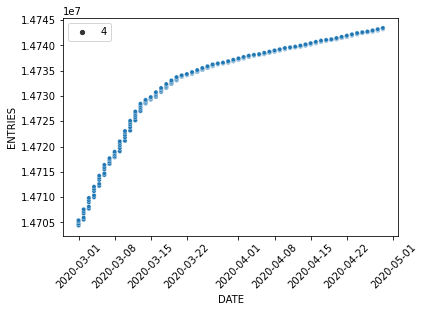

In [33]:
ax = sns.scatterplot(x="DATE", y="ENTRIES", data=data1 ,size=4)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

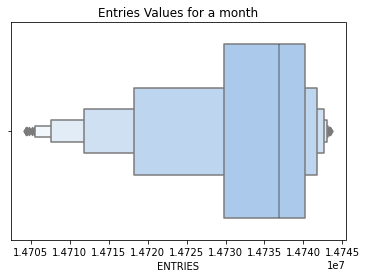

In [34]:
ax = sns.boxenplot(x='ENTRIES', data=data1,palette="pastel").set(xlabel='ENTRIES',title="Entries Values for a month")

In [35]:
mta_entries = MTA_data_covid.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).ENTRIES.max() - MTA_data_covid.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).ENTRIES.min()

mta_exits = MTA_data_covid.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).EXITS.max() - MTA_data_covid.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).EXITS.min()



In [36]:
mta_entries = MTA_data_covid.ENTRIES.reset_index()

mta_exits =MTA_data_covid.EXITS.reset_index()



In [54]:
mta_entries_exits = pd.merge(mta_entries, mta_exits, how="outer")

mta_entries_exits["TRAFFIC"] = mta_entries_exits["ENTRIES"] + mta_entries_exits["EXITS"]

mta_entries_exits["STATION"]=MTA_data_covid["STATION"]

mta_entries_exits["NAMEOFDAY"]=MTA_data_covid["NAMEOFDAY"]

mta_entries_exits

,index,ENTRIES,EXITS,TRAFFIC,STATION,NAMEOFDAY
0,0,7386928,2505750,9892678,59 ST,Saturday
1,1,7386935,2505759,9892694,59 ST,Saturday
2,2,7386975,2505840,9892815,59 ST,Saturday
3,3,7387107,2505884,9892991,59 ST,Saturday
4,4,7387394,2505952,9893346,59 ST,Saturday
...,...,...,...,...,...,...
5379334,5379334,5554,539,6093,RIT-ROOSEVELT,Friday
5379335,5379335,5554,539,6093,RIT-ROOSEVELT,Friday
5379336,5379336,5554,539,6093,RIT-ROOSEVELT,Friday
5379337,5379337,5554,539,6093,RIT-ROOSEVELT,Friday


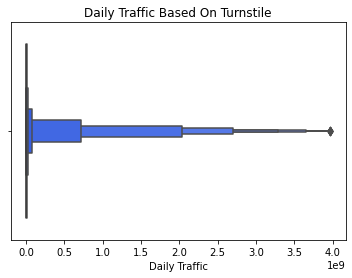

In [40]:
ax = sns.boxenplot(x='TRAFFIC', data=mta_entries_exits,palette="bright").set(xlabel='Daily Traffic',title="Daily Traffic Based On Turnstile")

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


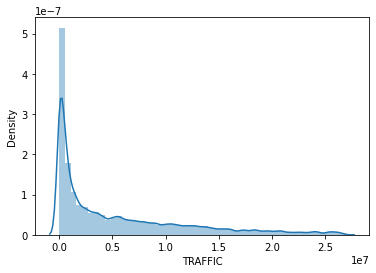

In [44]:
mta_traffic_under_percentileX = mta_entries_exits[mta_entries_exits["TRAFFIC"]<(mta_entries_exits.TRAFFIC.quantile(0.90))]
ax=sns.distplot(mta_traffic_under_percentileX["TRAFFIC"])

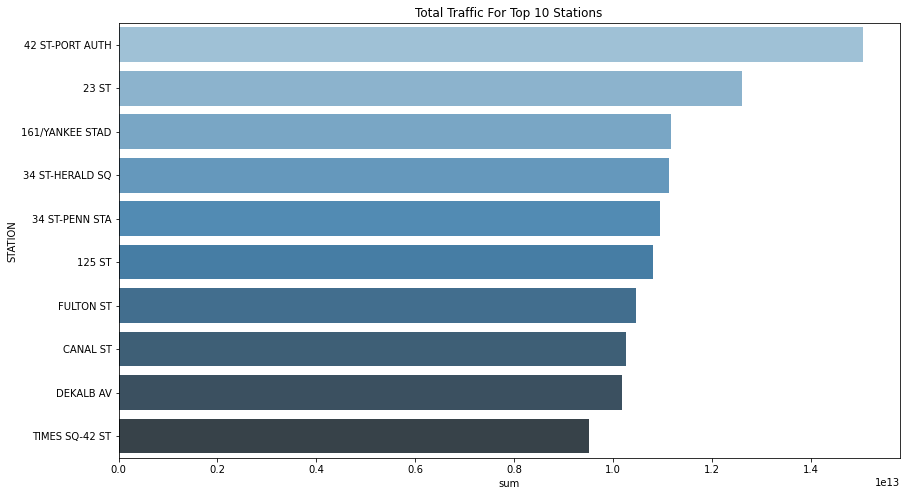

In [51]:
plt.figure(figsize=(14, 8))
plt.title("Total Traffic For Top 10 Stations")
graph1DF = mta_entries_exits.groupby(['STATION']).TRAFFIC.agg(['sum']).reset_index()
graph1DF = graph1DF.nlargest(10,'sum')
sns.barplot(x="sum", y="STATION", orient = "h", data=graph1DF, palette = "Blues_d")
plt.savefig('10TopStations.png', dpi = 1000)

In [53]:
mta_top10 = mta_entries_exits.groupby("STATION").sum().sort_values("TRAFFIC",ascending=False).head(10)
mta_top10

,index,ENTRIES,EXITS,TRAFFIC
STATION,,,,
42 ST-PORT AUTH,145696567028,8233614802938,6811768800325,15045383603263
23 ST,213297831721,6287236671912,6325562322308,12612798994220
161/YANKEE STAD,109277171156,5700987510258,5461933729137,11162921239395
34 ST-HERALD SQ,155529679343,4879496752684,6259448646987,11138945399671
34 ST-PENN STA,290354051409,5306169975842,5644865537757,10951035513599
125 ST,126646119280,6615432858237,4184832015738,10800264873975
FULTON ST,283125879416,5293860726117,5171442688796,10465303414913
CANAL ST,166086290399,4386351849034,5881037901767,10267389750801
DEKALB AV,58959055188,5917949150104,4257801177411,10175750327515


In [85]:
mta_busiest_day = mta_entries_exits.groupby("NAMEOFDAY").sum().sort_values("TRAFFIC",ascending=False)
mta_busiest_day = mta_busiest_day.reset_index()
mta_busiest_day

,NAMEOFDAY,index,ENTRIES,EXITS,TRAFFIC
0,Wednesday,2069553412748,33307914116854,27300052335668,60607966452522
1,Thursday,2067972229338,33282698234233,27226612836780,60509311071013
2,Saturday,2073911883184,33169554507447,27174482073214,60344036580661
3,Monday,2066149381534,33127460898500,27175183300972,60302644199472
4,Tuesday,2065065311480,33133823805370,27166002513184,60299826318554
5,Friday,2065385923989,33031762396475,27072293132289,60104055528764
6,Sunday,2060603206518,32938434724411,27070661967923,60009096692334


In [56]:
#The average of busiest traffic in between 2020-02-29 & 2020-04-29 according to each day

In [90]:
mta_top10

,index,ENTRIES,EXITS,TRAFFIC
STATION,,,,
42 ST-PORT AUTH,145696567028,8233614802938,6811768800325,15045383603263
23 ST,213297831721,6287236671912,6325562322308,12612798994220
161/YANKEE STAD,109277171156,5700987510258,5461933729137,11162921239395
34 ST-HERALD SQ,155529679343,4879496752684,6259448646987,11138945399671
34 ST-PENN STA,290354051409,5306169975842,5644865537757,10951035513599
125 ST,126646119280,6615432858237,4184832015738,10800264873975
FULTON ST,283125879416,5293860726117,5171442688796,10465303414913
CANAL ST,166086290399,4386351849034,5881037901767,10267389750801
DEKALB AV,58959055188,5917949150104,4257801177411,10175750327515


In [97]:
mta_top10 = mta_entries_exits.groupby(["STATION","NAMEOFDAY"]).sum()

mta_top10 = mta_top10.reset_index()

mta_top10 = mta_top10[(mta_top10["STATION"]=="42 ST-PORT AUTH") 
                  | (mta_top10["STATION"]=="23 ST")
                  | (mta_top10["STATION"]=='161/YANKEE STAD')
                  | (mta_top10["STATION"]=='34 ST-HERALD SQ')
                  | (mta_top10["STATION"]=="34 ST-PENN STA")
                  | (mta_top10["STATION"]=="125 ST")
                  | (mta_top10["STATION"]=="FULTON ST")
                  | (mta_top10["STATION"]=="CANAL ST")
                  | (mta_top10["STATION"]=="DEKALB AV")
                  | (mta_top10["STATION"]=="TIMES SQ-42 ST")]


mta_top10 = mta_top10.reset_index()

mta_top10

,level_0,STATION,NAMEOFDAY,index,ENTRIES,EXITS,TRAFFIC
0,63,125 ST,Friday,18107325910,946041266408,598133694630,1544174961038
1,64,125 ST,Monday,18054565718,945519972775,597739079311,1543259052086
2,65,125 ST,Saturday,18098335558,944049750638,597267122213,1541316872851
3,66,125 ST,Sunday,17987111621,941601123288,595592074810,1537193198098
4,67,125 ST,Thursday,18238438578,946063386418,599011327429,1545074713847
...,...,...,...,...,...,...,...
65,2473,TIMES SQ-42 ST,Saturday,18594316841,760368946993,602235713680,1362604660673
66,2474,TIMES SQ-42 ST,Sunday,18592248259,754554641969,599172303600,1353726945569
67,2475,TIMES SQ-42 ST,Thursday,18926464718,756852073366,609654885472,1366506958838
68,2476,TIMES SQ-42 ST,Tuesday,18564080850,758475571146,603222950251,1361698521397


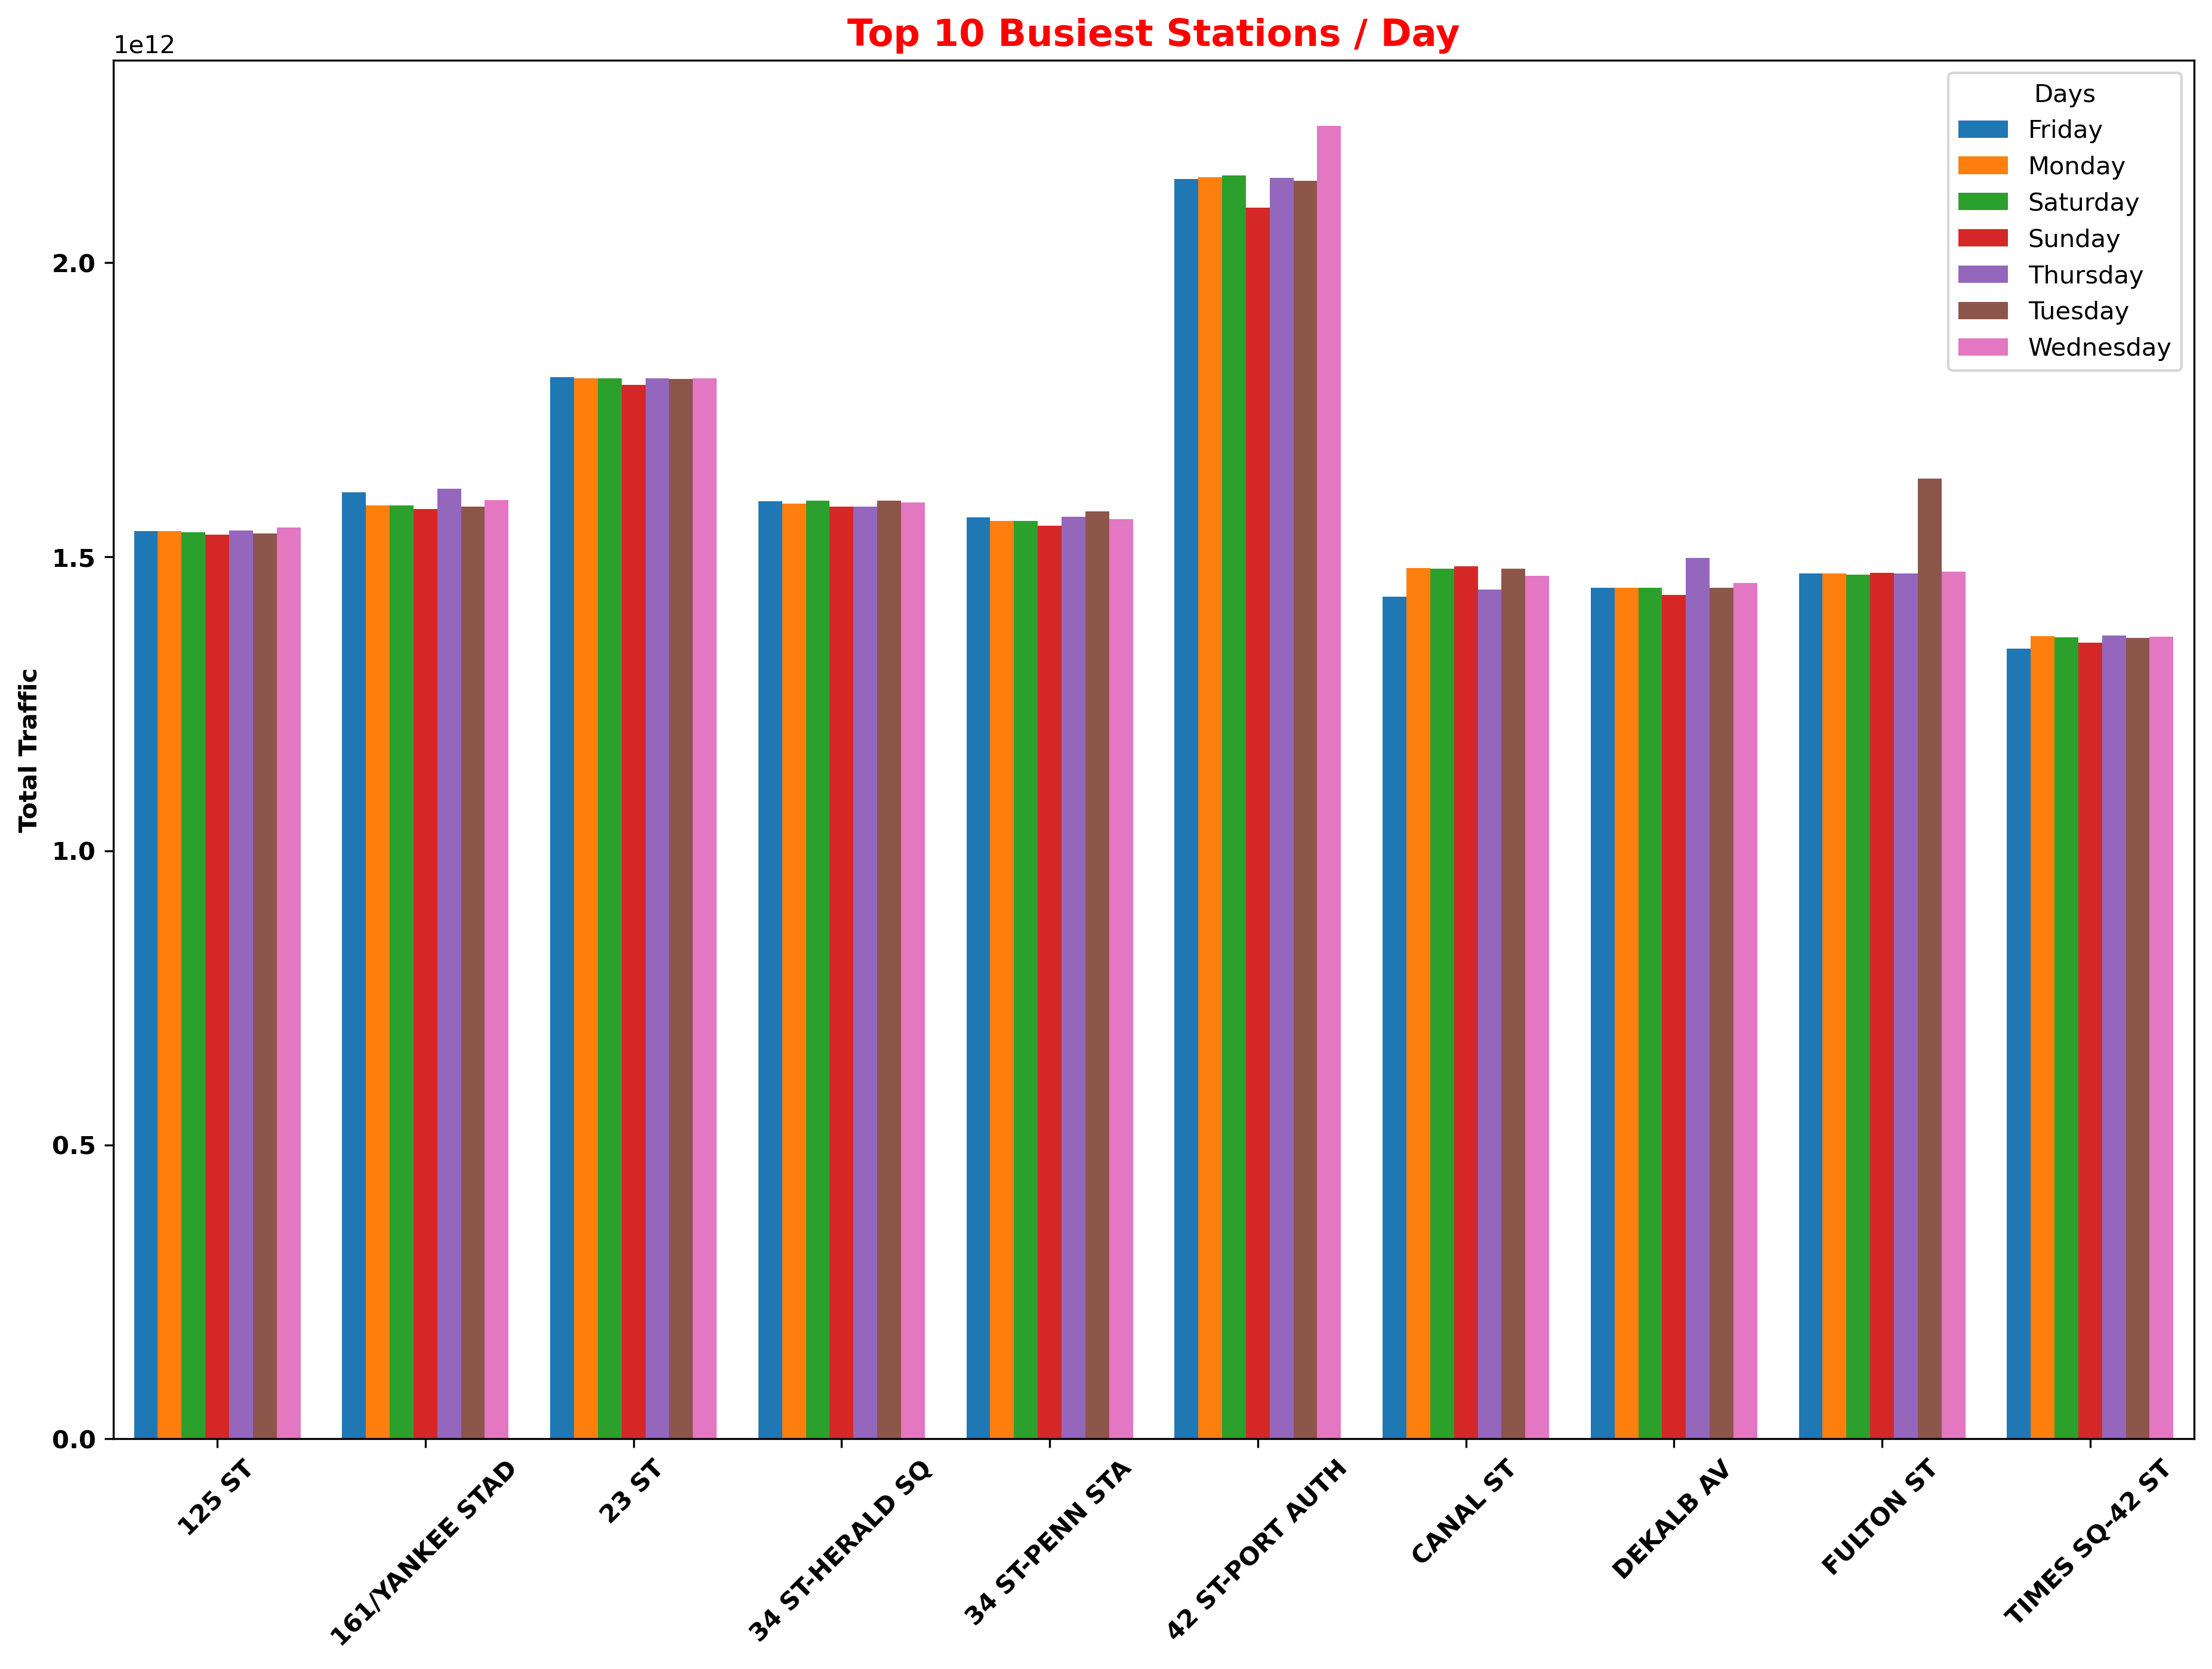

In [100]:
plt.figure(figsize=(15,10),dpi=300),
plt.style.use('default')
ax = sns.barplot(x="STATION", y="TRAFFIC", hue="NAMEOFDAY",data=mta_top10, saturation=1)
plt.title("Top 10 Busiest Stations / Day", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="Days")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()


In [101]:
mta_top10_heatmap = mta_top10.groupby(["STATION","NAMEOFDAY"]).TRAFFIC.mean().reset_index()

mta_top10_heatmap = mta_top10_heatmap.pivot("NAMEOFDAY","STATION","TRAFFIC")

mta_top10_heatmap = mta_top10_heatmap.reindex(index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

mta_top10_heatmap

STATION,125 ST,161/YANKEE STAD,23 ST,34 ST-HERALD SQ,34 ST-PENN STA,42 ST-PORT AUTH,CANAL ST,DEKALB AV,FULTON ST,TIMES SQ-42 ST
NAMEOFDAY,,,,,,,,,,
Monday,1543259052086,1587422418534,1803241048237,1590606976895,1561068407122,2145205824687,1481125094867,1446911176985,1471767112000,1365343924986
Tuesday,1539472476848,1584850025523,1802586527478,1595036102851,1577593157178,2139252339641,1479393908601,1446944514505,1633456648224,1361698521397
Wednesday,1549773599207,1596509374700,1803005316196,1592541307170,1564143331029,2232200905561,1467696319586,1455381798959,1475177344521,1363906731700
Thursday,1545074713847,1616026132597,1803208859784,1585239995899,1567846887863,2144411198602,1443843965676,1497822354869,1471403154128,1366506958838
Friday,1544174961038,1609490967574,1805570406708,1594855368925,1566608780183,2142046689938,1431955995283,1446879964153,1471662568840,1343907605180
Saturday,1541316872851,1587281257459,1803325857614,1595034315619,1561034681757,2148588380220,1479391730360,1446957633628,1469400415354,1362604660673
Sunday,1537193198098,1581341063008,1791860978203,1585631332312,1552740268467,2093678264614,1483982736428,1434852884416,1472436171846,1353726945569


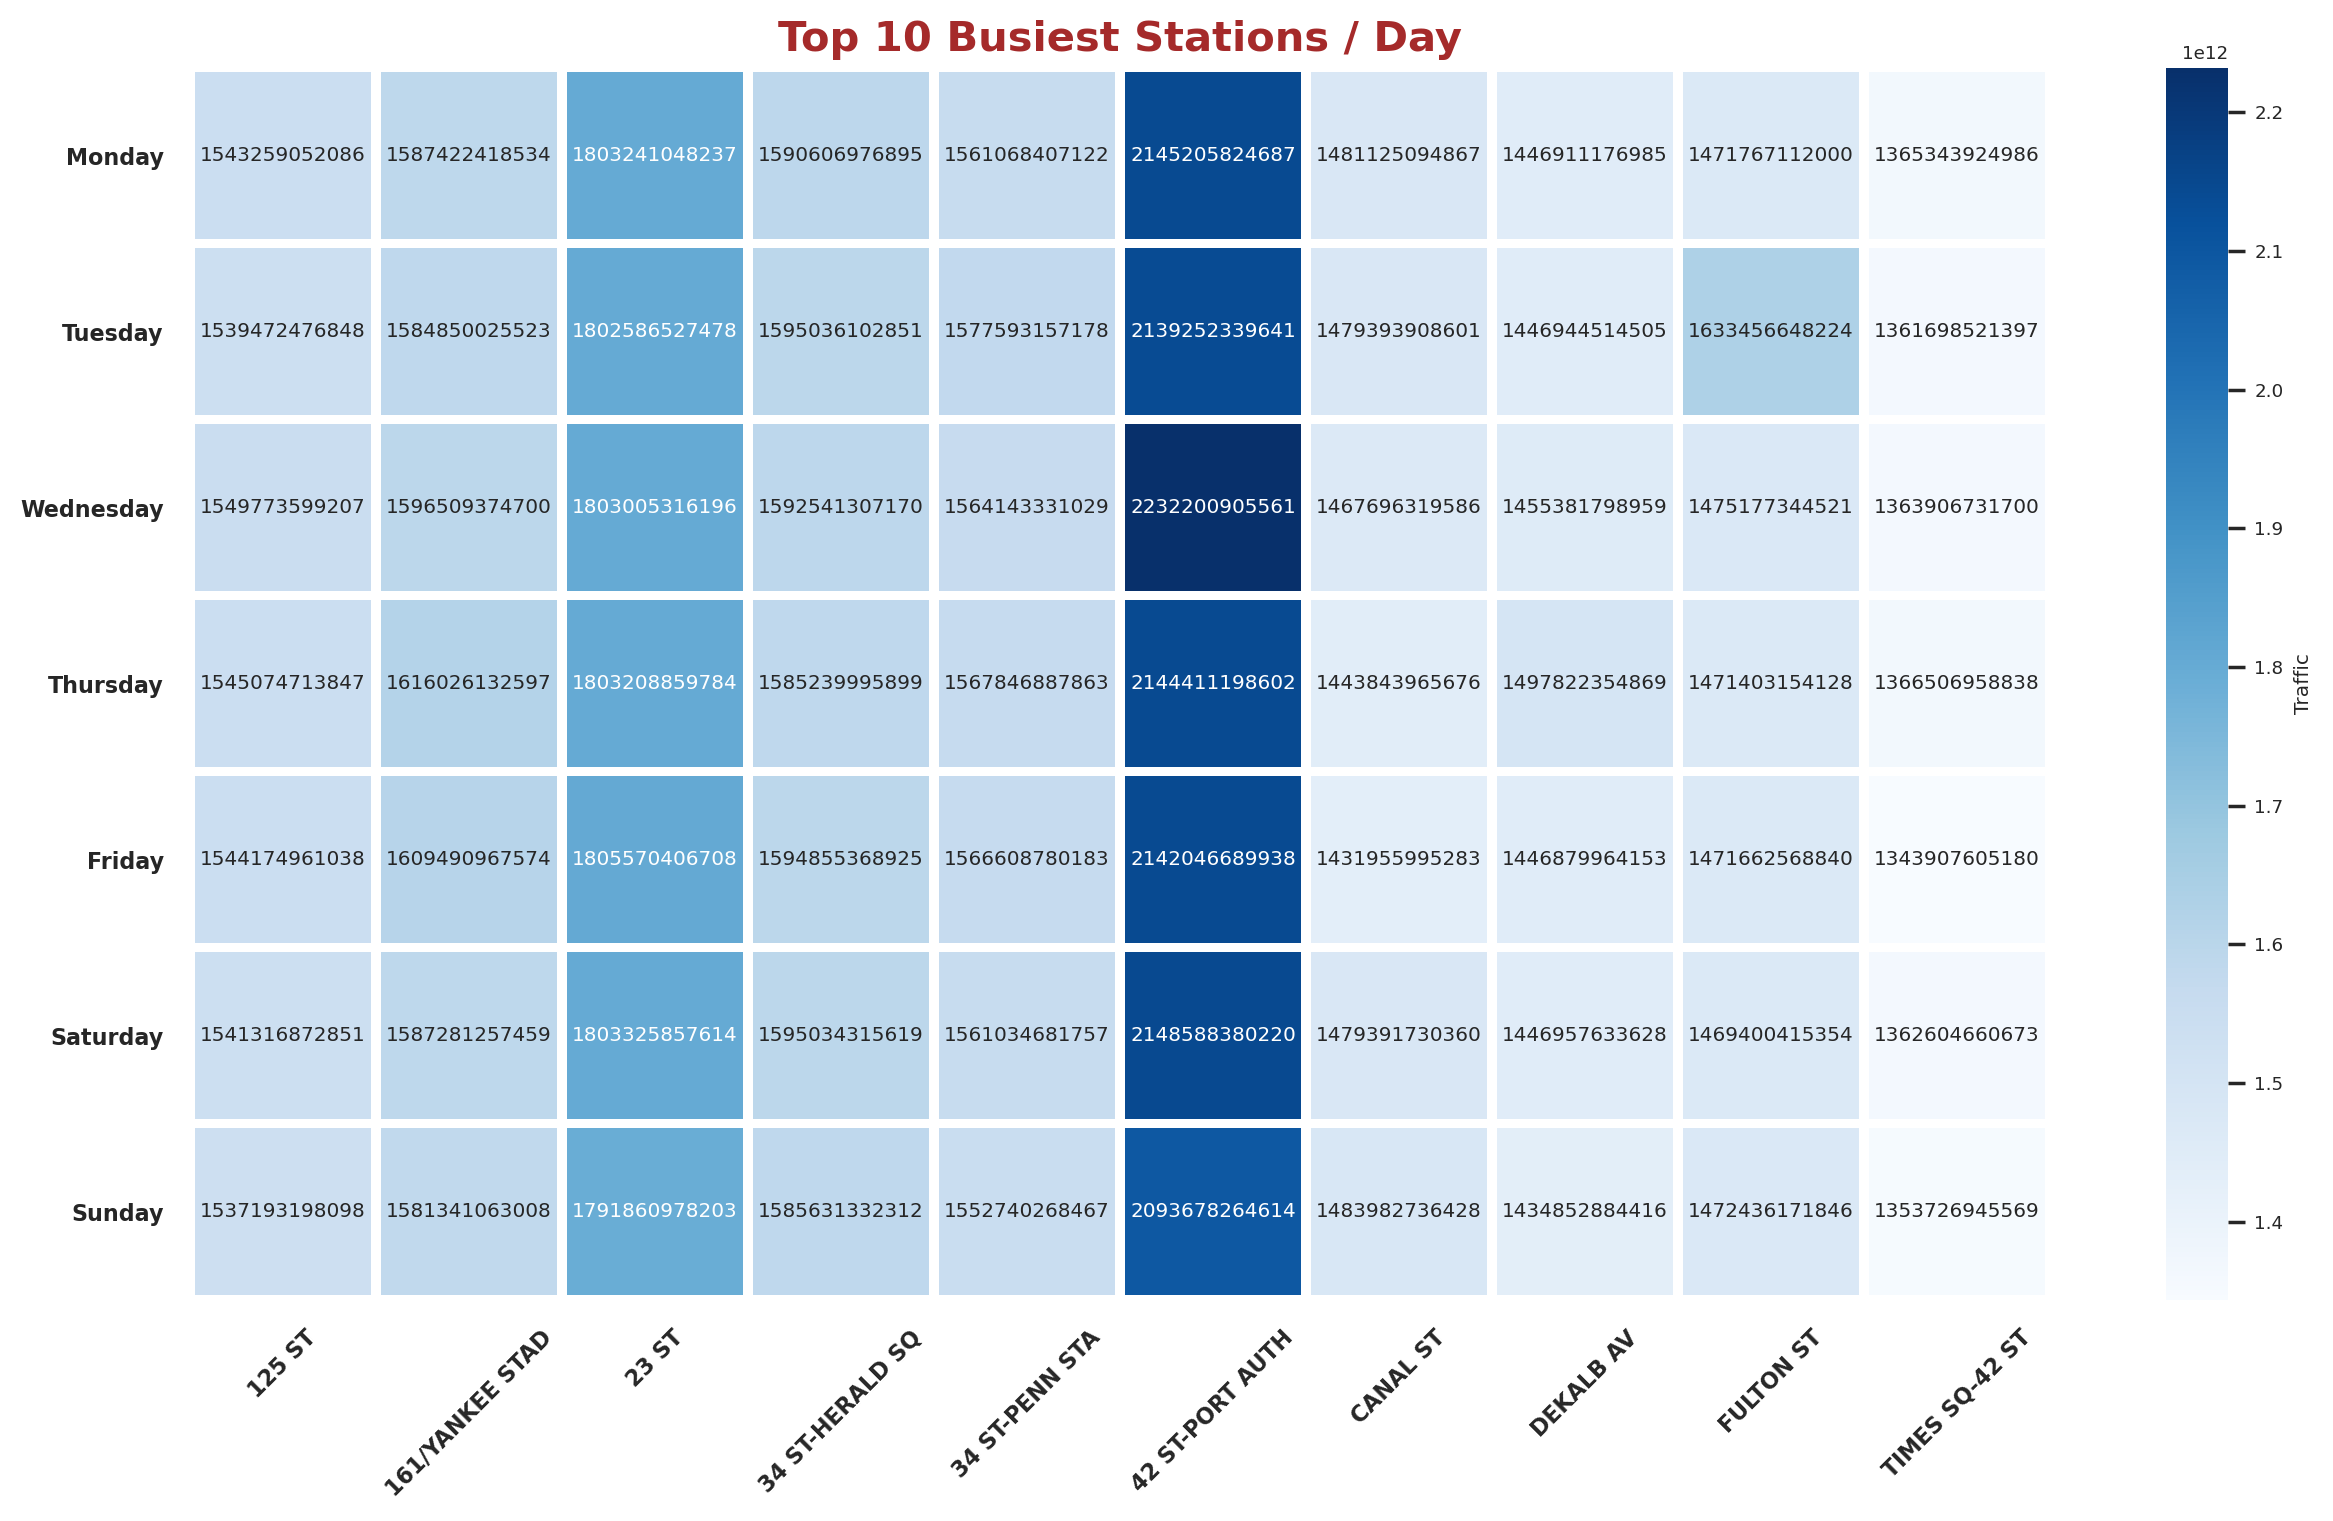

In [114]:
plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=0.6)
sns.heatmap(mta_top10_heatmap,annot=True,fmt="d", linewidths=3, cmap="Blues",cbar_kws={'label': 'Traffic'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=8)
plt.xticks(weight="bold",rotation=45,size=8)
plt.title("Top 10 Busiest Stations / Day",weight="bold",c="brown", fontsize=15)
plt.show()


In [119]:
mta_time = MTA_data_covid.sort_values(["STATION","TURNSTILE","Datetime"]).reset_index()
mta_time_group = mta_time.groupby(["TURNSTILE"])

mta_time["DIF_ENTRIES"] = mta_time_group["ENTRIES"].transform(pd.Series.diff)
mta_time["DIF_EXITS"] = mta_time_group["EXITS"].transform(pd.Series.diff)

mta_time.sample(30)

,index,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS
1048714,4894407,34 ST-PENN STA,R142-R293-01-00-02,2020-08-01,06:00:00,2020-08-01 06:00:00,Saturday,7358569,6446127,0.0,3.0
2687840,1284925,CATHEDRAL PKWY,N035-R334-00-00-01,2020-04-04,21:00:00,2020-04-04 21:00:00,Saturday,3933364,3549398,9.0,5.0
542928,3414886,18 AV,N550-R242-01-05-01,2020-06-17,00:00:00,2020-06-17 00:00:00,Wednesday,1675034624,806879359,0.0,0.0
3102558,36277,EAST 105 ST,H040-R376-00-00-01,2020-02-24,08:00:00,2020-02-24 08:00:00,Monday,8537573,8306277,340.0,135.0
1687229,3449591,72 ST,R161A-R452-01-00-00,2020-06-18,17:00:00,2020-06-18 17:00:00,Thursday,169578,704340,89.0,132.0
1507099,4505939,59 ST,R245A-R051-01-06-01,2020-07-24,16:00:00,2020-07-24 16:00:00,Friday,117503162,763527,5.0,16.0
4202690,766896,MARBLE HILL-225,R192-R039-00-00-00,2020-03-18,00:00:00,2020-03-18 00:00:00,Wednesday,4922249,538438,89.0,19.0
4240137,2987697,METROPOLITAN AV,N409-R268-00-00-05,2020-06-04,05:00:00,2020-06-04 05:00:00,Thursday,382080,436465,0.0,1.0
2311029,280012,BEACH 44 ST,N193-R337-00-00-00,2020-03-02,07:00:00,2020-03-02 07:00:00,Monday,24020,57148,32.0,31.0
4722462,287805,QUEENS PLAZA,N309A-R140-00-00-01,2020-03-01,12:00:00,2020-03-01 12:00:00,Sunday,3210980,1965935,32.0,22.0


In [120]:
print("Negative values for DIF_ENTRIES column: ")
print(len(mta_time[mta_time["DIF_ENTRIES"]<0]))
print("Negative values for DIF_EXITS column:")
print(len(mta_time[mta_time["DIF_EXITS"]<0]))

Negative values for DIF_ENTRIES column: 
43095
Negative values for DIF_EXITS column:
35248


In [123]:
mta_time["DIF_ENTRIES"] = mta_time["DIF_ENTRIES"].fillna(0)
mta_time["DIF_EXITS"] = mta_time["DIF_EXITS"].fillna(0)

In [124]:
mta_time['DIF_ENTRIES'][mta_time['DIF_ENTRIES'] < 0] = (mta_time["DIF_ENTRIES"].median())
mta_time['DIF_EXITS'][mta_time['DIF_EXITS'] < 0] = (mta_time["DIF_EXITS"].median())

<ipython-input-124-772caf9426e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_time['DIF_ENTRIES'][mta_time['DIF_ENTRIES'] < 0] = (mta_time["DIF_ENTRIES"].median())
<ipython-input-124-772caf9426e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_time['DIF_EXITS'][mta_time['DIF_EXITS'] < 0] = (mta_time["DIF_EXITS"].median())


In [125]:
mta_time['DIF_ENTRIES'][mta_time['DIF_ENTRIES'] > (mta_time["DIF_ENTRIES"].quantile(0.95))] = (mta_time["DIF_ENTRIES"].median()) 
mta_time['DIF_EXITS'][mta_time['DIF_EXITS'] > (mta_time["DIF_EXITS"].quantile(0.95))] = (mta_time["DIF_EXITS"].median())

<ipython-input-125-75217c12b809>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_time['DIF_ENTRIES'][mta_time['DIF_ENTRIES'] > (mta_time["DIF_ENTRIES"].quantile(0.95))] = (mta_time["DIF_ENTRIES"].median())
<ipython-input-125-75217c12b809>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_time['DIF_EXITS'][mta_time['DIF_EXITS'] > (mta_time["DIF_EXITS"].quantile(0.95))] = (mta_time["DIF_EXITS"].median())


In [126]:
print("Descriptive Statistics for DIF_ENTRIES column:")
print(mta_time["DIF_ENTRIES"].describe())
print("Descriptive Statistics for DIF_EXITS column:")
print(mta_time["DIF_EXITS"].describe())

Descriptive Statistics for DIF_ENTRIES column:
count    5.379339e+06
mean     2.364562e+01
std      3.450600e+01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+01
75%      3.100000e+01
max      1.770000e+02
Name: DIF_ENTRIES, dtype: float64
Descriptive Statistics for DIF_EXITS column:
count    5.379339e+06
mean     2.311212e+01
std      3.207930e+01
min      0.000000e+00
25%      2.000000e+00
50%      1.100000e+01
75%      3.000000e+01
max      1.630000e+02
Name: DIF_EXITS, dtype: float64


In [128]:
mta_time["TRAFFIC"] = mta_time["DIF_ENTRIES"] + mta_time["DIF_EXITS"]
mta_time

,index,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS,TRAFFIC
863916,3933089,34 ST-HERALD SQ,A025-R023-01-03-01,2020-07-06,12:00:00,2020-07-06 12:00:00,Monday,1237379739,1813814505,10.0,109.0,119.0
1040984,4273459,34 ST-PENN STA,R141-R031-00-03-01,2020-07-16,16:00:00,2020-07-16 16:00:00,Thursday,300173,2926766,53.0,39.0,92.0
3345886,4385271,FRESH POND RD,K025-R404-00-03-00,2020-07-21,01:00:00,2020-07-21 01:00:00,Tuesday,14812015,6313574,6.0,101.0,107.0
3935033,496707,JKSN HT-ROOSVLT,N324-R018-00-02-00,2020-03-10,00:00:00,2020-03-10 00:00:00,Tuesday,524444,0,0.0,0.0,0.0
137812,1795257,125 ST,R174-R034-00-00-04,2020-04-22,08:00:00,2020-04-22 08:00:00,Wednesday,4951485,6301801,10.0,51.0,61.0
5274208,3902115,WHITLOCK AV,R413-R325-00-03-01,2020-06-29,08:00:00,2020-06-29 08:00:00,Monday,5191687,3151515,107.0,25.0,132.0
2504694,637997,BRIGHTON BEACH,B031-R172-01-06-02,2020-03-14,00:00:00,2020-03-14 00:00:00,Saturday,29553,22028,2.0,3.0,5.0
3264036,4624954,FORDHAM RD,N217-R112-00-03-00,2020-07-26,20:00:00,2020-07-26 20:00:00,Sunday,43428,70776,36.0,76.0,112.0
5167611,2951275,W 4 ST-WASH SQ,N083-R138-01-03-02,2020-06-05,01:00:00,2020-06-05 01:00:00,Friday,22408505,11145115,9.0,5.0,14.0
2025589,4870830,96 ST-2 AVE,N702A-R572-01-03-03,2020-08-05,13:00:00,2020-08-05 13:00:00,Wednesday,873120,628586,39.0,32.0,71.0


In [131]:
mta_time_a=mta_time[mta_time["STATION"]=="42 ST-PORT AUTH"]
stations_day_time = mta_time_a[['STATION', 'TIME', 'NAMEOFDAY','TRAFFIC']]


In [135]:
stations_day_time_group = stations_day_time.groupby(['STATION','NAMEOFDAY','TIME'], as_index=False)
stations_day_time_group = stations_day_time_group[['TRAFFIC']].sum()
stations_day_time_group['TIME'] = pd.to_datetime(stations_day_time_group['TIME'], format='%H:%M:%S')
stations_day_time_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 226
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    227 non-null    object        
 1   NAMEOFDAY  227 non-null    object        
 2   TIME       227 non-null    datetime64[ns]
 3   TRAFFIC    227 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 8.9+ KB


In [143]:
rounded_day_time = stations_day_time_group.set_index('TIME').groupby(['STATION','NAMEOFDAY'])
rounded_day_time = rounded_day_time.resample("4H").sum()
rounded_day_time = rounded_day_time.reset_index()
rounded_day_time.head(6)

,STATION,NAMEOFDAY,TIME,TRAFFIC
0,42 ST-PORT AUTH,Friday,1900-01-01 00:00:00,56699.0
1,42 ST-PORT AUTH,Friday,1900-01-01 04:00:00,20421.0
2,42 ST-PORT AUTH,Friday,1900-01-01 08:00:00,74871.0
3,42 ST-PORT AUTH,Friday,1900-01-01 12:00:00,75695.0
4,42 ST-PORT AUTH,Friday,1900-01-01 16:00:00,86812.0
5,42 ST-PORT AUTH,Friday,1900-01-01 20:00:00,76104.0


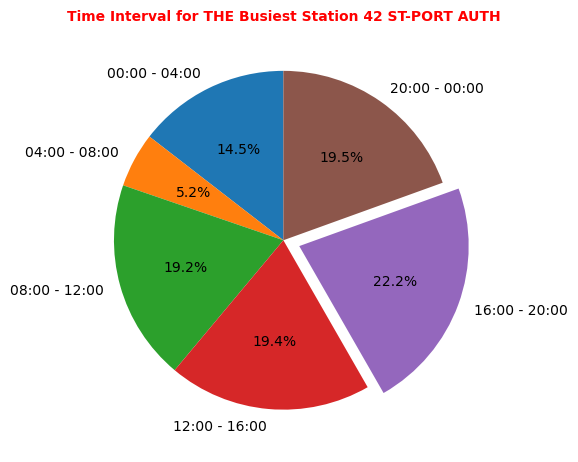

In [144]:
plt.style.use('seaborn-notebook')
fig1, ax1 = plt.subplots()
time = '00:00 - 04:00', '04:00 - 08:00', '08:00 - 12:00', '12:00 - 16:00','16:00 - 20:00','20:00 - 00:00'
traffic = [56699, 20421, 74871, 75695, 86812 ,76104]
explode = (0, 0, 0, 0, 0.1 ,0)  
ax1.pie(traffic, explode=explode, labels=time, autopct='%1.1f%%', startangle=90)
plt.title("Time Interval for THE Busiest Station 42 ST-PORT AUTH", weight="bold", c="red", fontsize=10)
plt.show()

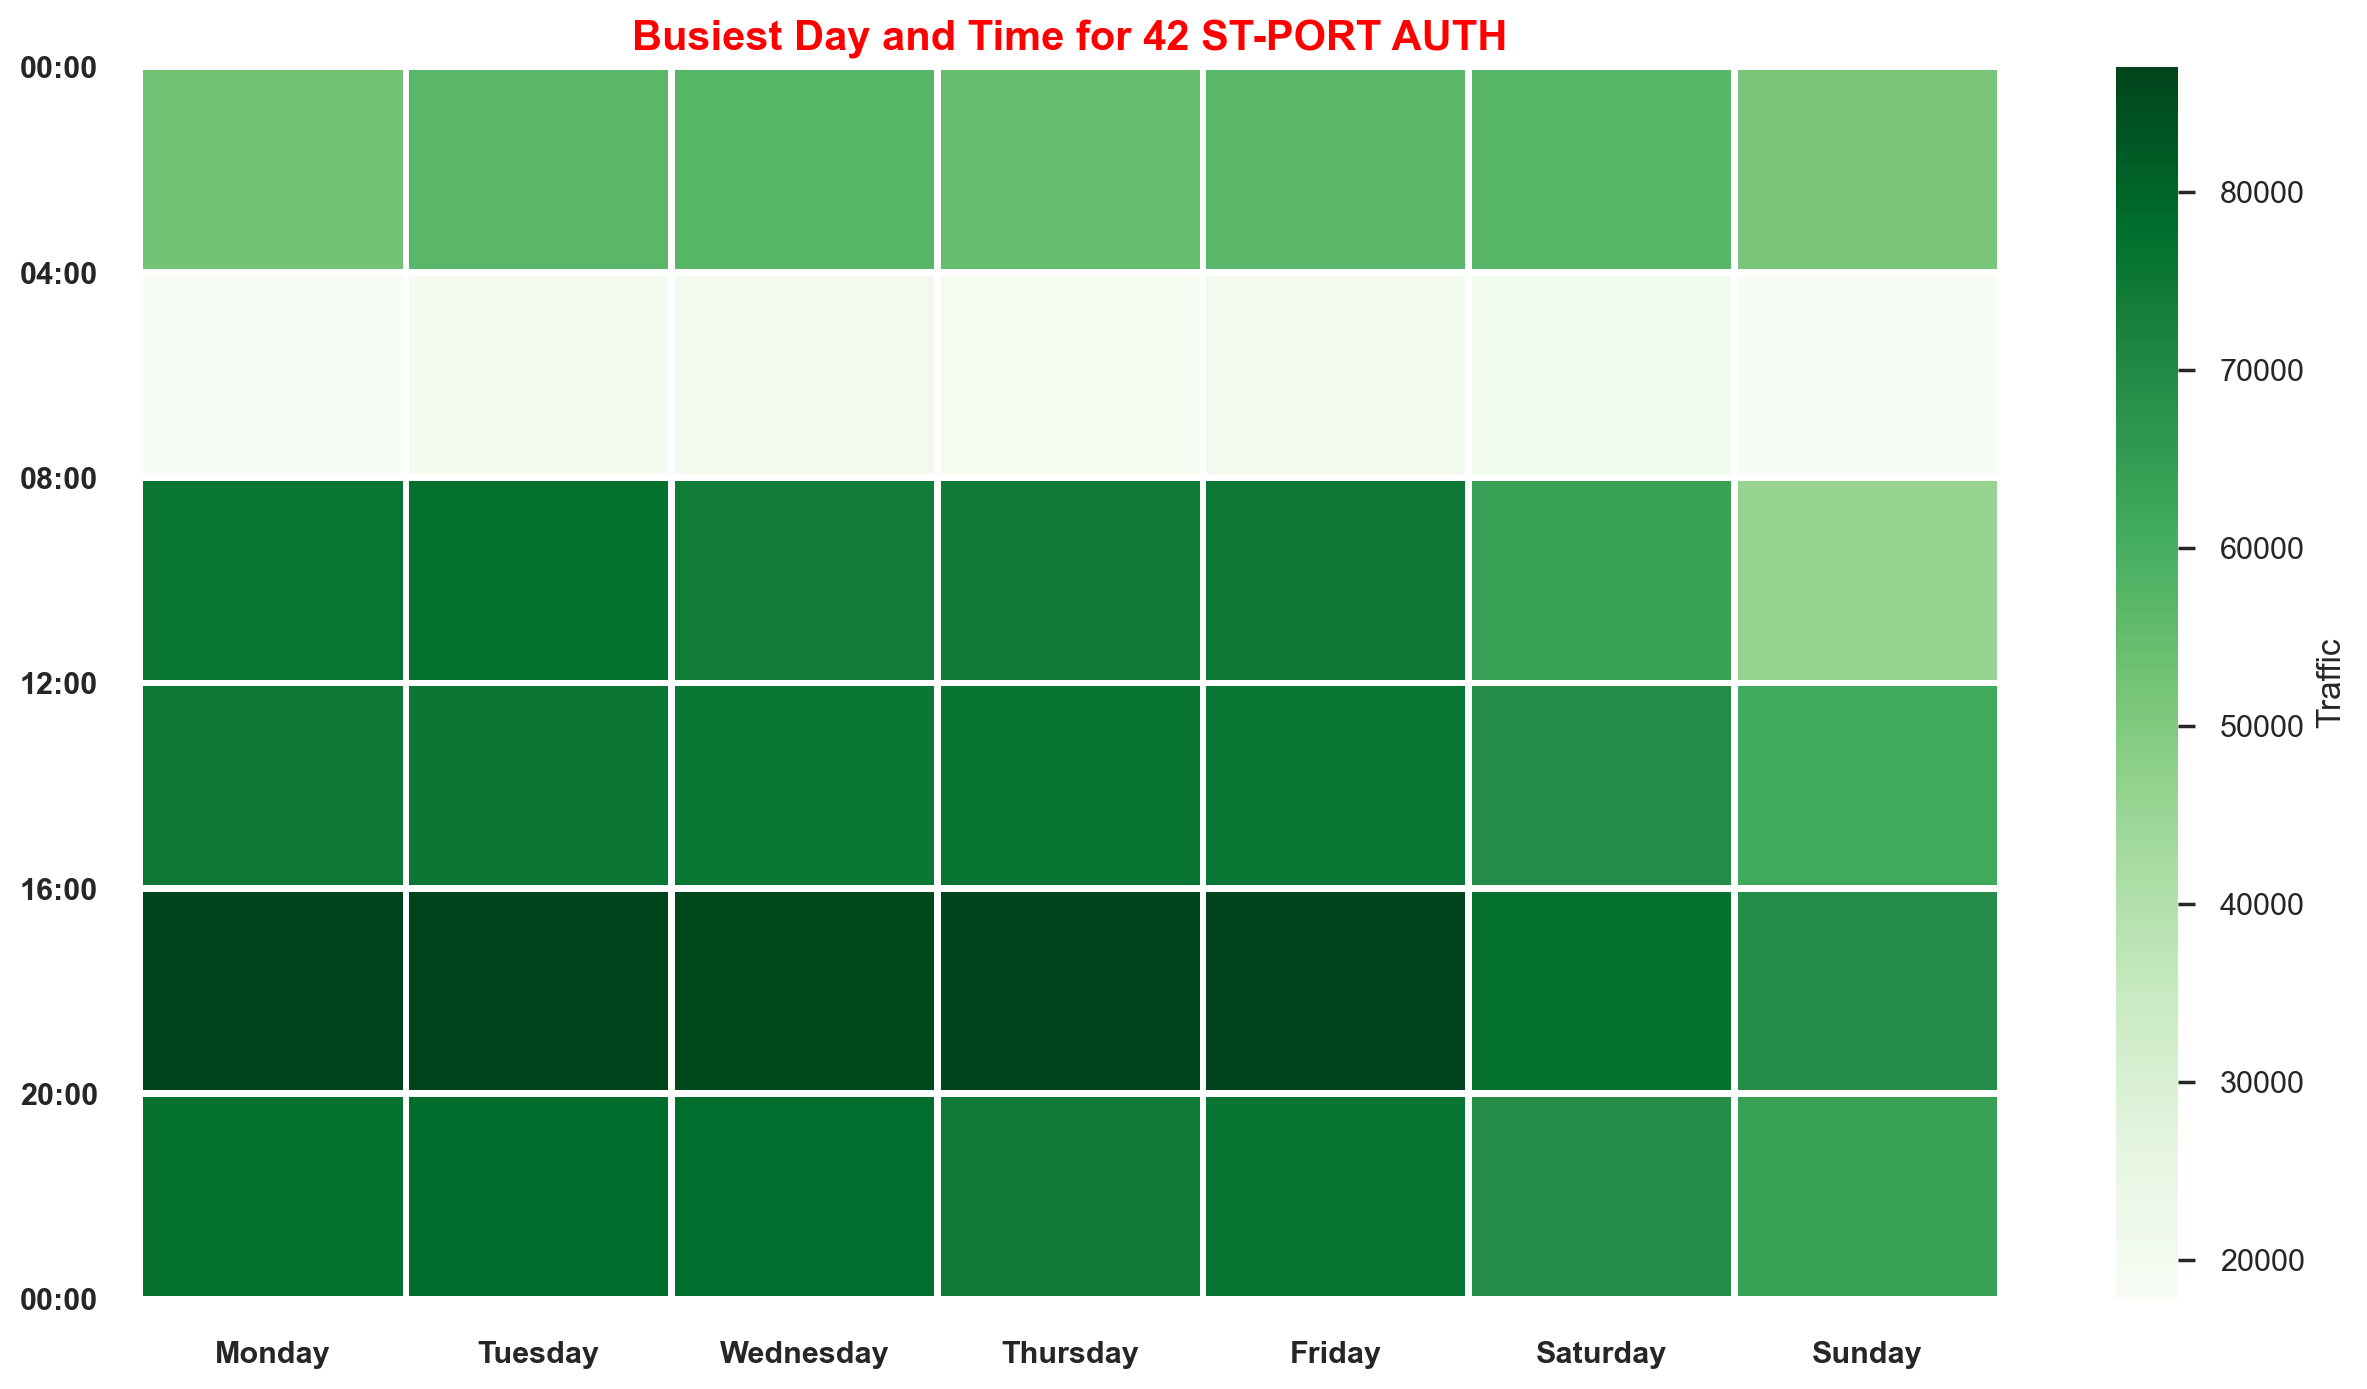

In [147]:
mta_top1_heatmap_detail = rounded_day_time.groupby(["NAMEOFDAY","TIME"])
mta_top1_heatmap_detail = mta_top1_heatmap_detail["TRAFFIC"].mean().reset_index()

mta_top1_heatmap_detail = rounded_day_time.pivot(index="TIME", columns="NAMEOFDAY",values="TRAFFIC")
mta_top1_heatmap_detail = mta_top1_heatmap_detail[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

#Heatmap for top7 stations per day

plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(mta_top1_heatmap_detail,annot=False, linewidths=2, cmap="Greens",cbar_kws={'label': 'Traffic'})
plt.style.use('seaborn-talk')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0)
plt.yticks([0,1,2,3,4,5,6],["00:00","04:00","08:00","12:00","16:00","20:00","00:00"])
plt.xticks(weight="bold",rotation=0)
plt.title("Busiest Day and Time for 42 ST-PORT AUTH",weight="bold",c="red", fontsize=15)
ax.xaxis.get_majorticklabels()[2].set_x(-.5)
plt.show()